In [71]:
import xarray as xr, os, matplotlib.pyplot as plt, numpy as np, pandas as pd
import afloat.plot.plotting as zplot

# Parse functions 

In [129]:
import numpy as np

# Example boxcar matrix
A = np.array([[1, 1, 0],
              [1, 1, 0],
              [0, 0, 1]], dtype=float)

# Add a small positive diagonal value
epsilon = 1e-6
A_modified = A + epsilon * np.eye(A.shape[0])
A_modified = A

# Compute the lower Cholesky decomposition
L = np.linalg.cholesky(A_modified)

print("Modified matrix A':\n", A_modified)
print("Lower triangular matrix L:\n", L)

LinAlgError: Matrix is not positive definite

In [135]:
d = x-x.T

In [151]:

x = np.arange(0, 10, 1)[:, None]
d = x-x.T

i_boxcar = np.abs(d) < 1.5
k_boxcar = np.zeros_like(d)
k_boxcar[i_boxcar] = 3

jitter = 1e2
# jitter = np.random.randn(len(x))*jitter
k_boxcar = k_boxcar + jitter*np.eye(k_boxcar.shape[0])

print(np.allclose(k_boxcar, k_boxcar.T))
print(np.linalg.eigvalsh(k_boxcar))


True
[ 97.24304216  97.9524788   99.0708356  100.50750992 102.14611097
 103.85388903 105.49249008 106.9291644  108.0475212  108.75695784]


array([-2.74695784, -2.0375212 , -0.9191644 ,  0.51750992,  2.15611097,
        3.86388903,  5.50249008,  6.9391644 ,  8.0575212 ,  8.76695784])

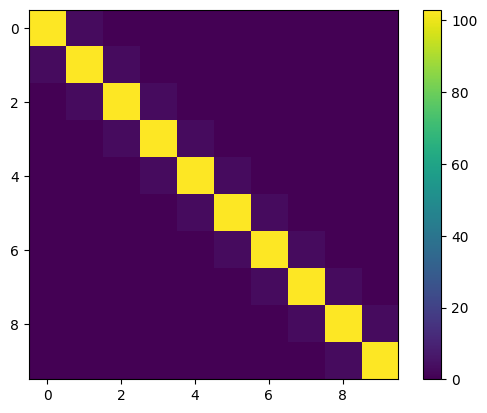

In [152]:

plt.imshow(k_boxcar)
plt.colorbar()

# T = np.linalg.inv(k_boxcar)

L = np.linalg.cholesky(k_boxcar)

In [112]:
np.diag(jitter) * np.eye(k_boxcar.shape[0])

array([[-0.0958355 ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.07547741,  0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.        ,  0.02395979, ..., -0.        ,
        -0.        ,  0.        ],
       ...,
       [-0.        ,  0.        ,  0.        , ..., -0.07770627,
        -0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.10440579,  0.        ],
       [-0.        ,  0.        ,  0.        , ..., -0.        ,
        -0.        ,  0.15286018]])

# Parse functions


In [2]:

def read_text(sub_file, savedir='.'):
    """Read in a text file from the HFRadar data and return a pandas dataframe.
    """
    
    print(f'reading {sub_file}')

    with open(os.path.join(savedir, sub_file), 'rt') as fn:
        lines = fn.readlines()

    oind = matches = [i for i, x in enumerate(lines) if '%Origin:' in x]
    oline = lines[oind[0]]
    odata = oline.split()[1::]
    coords = np.array([float(x) for x in odata])

    sind = matches = [i for i, x in enumerate(lines) if '%TableStart:' in x]
    if len(sind) == 0:
        return None, None
    sind = sind[0]+3
    eind = matches = [i for i, x in enumerate(lines) if '%TableEnd:' in x][0]

    clines = lines[sind:eind]

    def parse_line(cline):

        clinen = [float(x) for x in cline.split()]
        
        return np.array(clinen)

    clists = [parse_line(cline) for cline in clines]
    clists

    data = np.array(clists)
    data.shape

    if '.ruv' in sub_file:
        cols = ['Longitude' , 'Latitude',    'U comp' ,  'V comp', 'Spatial Error',  'Spatial Count',  'Temporal Count', 'X Distance',  'Y Distance',  'Range', 'Bearing', 'Velocity', 'Direction', 'Spectra']
    elif '.hfrss10lluv' in sub_file:
        cols = ['Longitude' , 'Latitude',    'U comp' ,  'V comp', 'Spatial Count',  'Temporal Count', 'X Distance',  'Y Distance',  'Range', 'Bearing', 'Velocity', 'Direction', 'Spectra']
    # cols = lines[sind-2].split()[1::]
    len(cols)
    dataframe = pd.DataFrame(data, columns=cols)

    return sub_file, dataframe, coords

def get_scenetime(scene):
    """Get the scene time from the scene number. Assumes 48 scenes a day which the Kirinich and Lentx data does have. 
    """

    hour = scene//2
    if scene % 2 == 0:
        minute = 0
    else:
        minute = 30
    
    scenetime = f'{hour:02d}{minute:02d}'
    return scenetime


def Check_PSD(Matrix):
    e = np.linalg.eig(Matrix)[0]
    ie = np.imag(e)
    if np.allclose(Matrix, Matrix.T):
        t = ''
        t2 = '.'
    else:
        t = 'NOT '
        t2 = '!!!'
    print(f'The matrix is {t}symmetric{t2}')
    print(f'There are {sum(e<0)} negative eigenvalues')
    print(f'There are {sum(ie!=0)} nonzero imaginary eigenvalues')
    print(f'    {sum(ie!=0) - len(ie) + sum(np.isclose(ie, 0))} of these are very nearly zero...')
    print()

print('Sigma:')



Sigma:


# Do some geographic stuff
We need to work in UTM so set up a domain and get the shape file

In [156]:
east_eddy[1]-east_eddy[0]

array([798.19358806, 798.28162636, 798.36965199, 798.45766496,
       798.54566527, 798.63365291, 798.72162788, 798.80959019,
       798.89753982, 798.98547678, 799.07340107, 799.16131269,
       799.24921163, 799.33709789, 799.42497147, 799.51283238,
       799.6006806 , 799.68851614, 799.77633899, 799.86414916,
       799.95194665, 800.03973144, 800.12750355, 800.21526296,
       800.30300969, 800.39074372, 800.47846505, 800.56617369,
       800.65386963, 800.74155287, 800.82922342, 800.91688126,
       801.00452639, 801.09215883, 801.17977855, 801.26738557])

Be patient with this cell it usually takes about 40 seconds
Selected resolution: f
Found 4 shapes


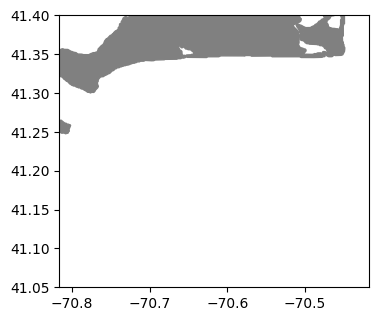

In [3]:
from pyproj import Proj
import utm

print('Be patient with this cell it usually takes about 40 seconds')

xl = np.array((-70.8160365, -70.4172975))
yl = np.array((41.05, 41.4))

fig, ax = plt.subplots(1, 1, figsize=(4,4))
plt.xlim(xl)
plt.ylim(yl)
plt.gca().set_aspect('equal', adjustable='box')

verts = zplot.global_coast_fill(resolution='f')
# verts = zplot.global_coast_fill(resolution='i')
print(f'Found {len(verts)} shapes')

NL, EL, z1, z2 = utm.from_latlon(yl, xl)


# UTM Conversion

In [4]:
from matplotlib import path
p = path.Path([[xl[0], yl[0]], [xl[0], yl[1]], [xl[1], yl[1]], [xl[1], yl[0]]])

verts_utm = []
for v in verts:
    # x, y = v
    x = np.array([vv[0] for vv in v])
    y = np.array([vv[1] for vv in v])

    bool = p.contains_points(v)
    print(bool.any())
    if bool.any():

        EE, NN, z1, z2 = utm.from_latlon(y, x)

        verts_utm.append(list(zip(EE, NN)))

xl_utm, yl_utm, z1, z2  = utm.from_latlon(yl, xl)


False
True
True
True


In [69]:
z1, z2

(19, 'T')

(4535896.249449012, 4594131.547712428)

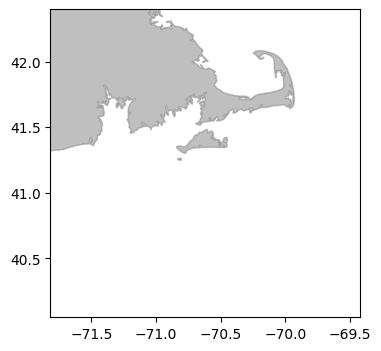

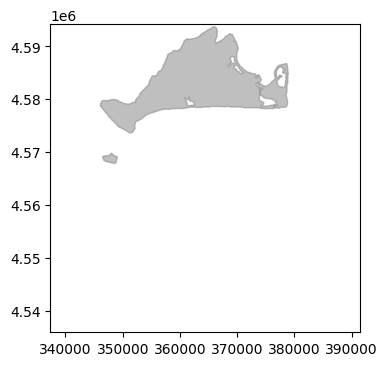

In [5]:
from matplotlib.collections import PolyCollection

collection_kwargs={'color': '0.5', 'alpha': 0.5}

def plot_vinyard(ax, verts=verts, collection_kwargs=collection_kwargs):
    poly = PolyCollection(verts, **collection_kwargs)   

    ax.add_collection(poly)
# poly.set_alpha(alpha)

fig, ax = plt.subplots(1, 1, figsize=(4,4))
plot_vinyard(ax, verts=verts)

plt.xlim(xl[0]-1, xl[1]+1)
plt.ylim(yl[0]-1, yl[1]+1)

fig, ax = plt.subplots(1, 1, figsize=(4,4))
plot_vinyard(ax, verts=verts_utm)

plt.xlim(xl_utm[0]-10000, xl_utm[1]+10000)
plt.ylim(yl_utm[0]-10000, yl_utm[1]+10000)


In [ ]:

dstr = '2014_08_02' # My original
# dstr = '2014_08_03' 
# dstr = '2014_08_24' # Big eddy in kizza and lentx Fig 11 - no radial data it seems :(

fn_eddy = f'./mvco2_eddies/mvco2_eddies/WHOI_ISLE_HFR_{dstr}_800mgrid_1000mrad_22-Feb-2017.nc' 

os.path.exists(fn_eddy)

ds_eddy = xr.open_dataset(fn_eddy)
ds_eddy

<xarray.Dataset> Size: 3MB
Dimensions:    (t: 48, lon: 39, lat: 36)
Coordinates:
    datetime   (t) datetime64[ns] 384B ...
    Longitude  (lon) float64 312B ...
    Latitude   (lat) float64 288B ...
Dimensions without coordinates: t, lon, lat
Data variables:
    East_vel   (t, lat, lon) float64 539kB ...
    North_vel  (t, lat, lon) float64 539kB ...
    East_err   (t, lat, lon) float64 539kB ...
    North_err  (t, lat, lon) float64 539kB ...
    err_cov    (t, lat, lon) float64 539kB ...
    total_err  (t, lat, lon) float64 539kB ...
Attributes: (12/22)
    CREATION_DATE:        22-Feb-2017
    creator_name:         A. Kirincich
    creator_email:        akirincich@whoi.edu
    naming_authority:     edu.whoi.mvco
    EXPERIMENT:           Inner Shelf Lateral Exchange
    Abstract:             This data was collected by Kirincich as part of ong...
    ...                   ...
    max_latitude:         41.33856
    max_latitude_units:   degree_north
    min_longitude:        -70.797912
    min_longitude_units:  degree_east
    max_longitude:        -70.435422
    max_longitude_units:  degree_east

In [45]:
n_lat = len(ds_eddy['lat'])
n_lon = len(ds_eddy['lon'])

lon_eddy = np.linspace(ds_eddy.attrs['min_longitude'], ds_eddy.attrs['max_longitude'], n_lon)
lat_eddy = np.linspace(ds_eddy.attrs['min_latitude'],  ds_eddy.attrs['max_latitude'],  n_lat)

# These need to be flipped to match the topo. I only discovered this from looking at Kizza and Lentz Fig 11
if True:
    lat_eddy = lat_eddy[::-1]

lat_eddy, lon_eddy = np.meshgrid(lat_eddy, lon_eddy)

print(lon_eddy.shape)


# ds.East_vel.values.shape

(39, 36)


In [8]:
sites = ['LPWR', 'METS', 'SQUB']


In [38]:
U

array([[999., 999., 999., ..., 999., 999., 999.],
       [999., 999., 999., ..., 999., 999., 999.],
       [999., 999., 999., ..., 999., 999., 999.],
       ...,
       [999., 999., 999., ..., 999., 999., 999.],
       [999., 999., 999., ..., 999., 999., 999.],
       [999., 999., 999., ..., 999., 999., 999.]])

# Now a big GIF


reading RDL_m_WHOI_LPWR_2014_08_02_0000.hfrss10lluv
reading RDL_m_WHOI_METS_2014_08_02_0000.hfrss10lluv
reading RDL_m_WHOI_SQUB_2014_08_02_0000.hfrss10lluv


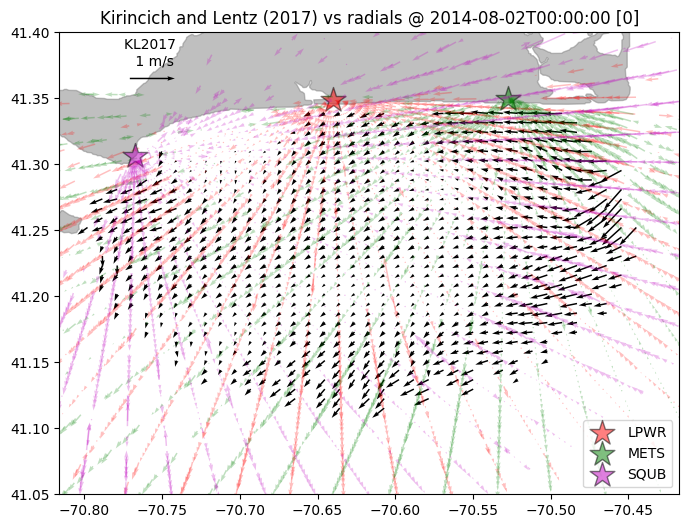

NameError: name 'error' is not defined

In [ ]:
import afloat.plot.gif as zgif 

sites = ['LPWR', 'METS', 'SQUB']
radar_colours = ['r', 'g', 'm']

gm = zgif.gif_maker(f'24H_eddy_{dstr}.gif', './gifs')

real  = True
for scene in np.arange(0, 48):

    fig, ax = plt.subplots(1, 1, figsize=(8,6))

    U, V = ds_eddy.East_vel.values, ds_eddy.North_vel.values
    U, V = U[scene, :, :], V[scene, :, :]
    U[U==999] = np.nan

    mq = plt.quiver(lon_eddy, lat_eddy, U.T, V.T)

    # Title without decimal seconds
    tst = f'{ds_eddy.datetime.values[scene]}'
    tst = tst[0:tst.find('.')]
    plt.title(f'Kirincich and Lentz (2017) vs radials @ {tst} [{scene}]')
    
    plt.gca().set_ylim([41.05, 41.4])
    if real:
        # verts = zplot.global_coast_fill(resolution='i')
        plot_vinyard(plt.gca(), verts=verts)
        
    xl = plt.gca().get_xlim()
    yl = plt.gca().get_ylim()

    scenetime = get_scenetime(scene)
    for i, site in enumerate(sites):

        fn = f'./2014/{site}/RDL_m_WHOI_{site}_{dstr}_{scenetime}.hfrss10lluv'

        savedir, sub_file = os.path.split(fn)
        sub_file, dataframe, coords = read_text(sub_file, savedir=savedir)

        # errr
        # plt.plot(coords[1], coords[0], '*')
        plt.scatter(coords[1], coords[0], marker='*', color=radar_colours[i], s=350, label=site, alpha=0.5, edgecolors='k')
        # plt.scatter(coords[1], coords[0], marker='*', color=radar_colours[i], s=350, label=site, alpha=0.5)
        
        my_lat = dataframe.Latitude
        my_lon = dataframe.Longitude    

        plt.quiver(my_lon, my_lat, dataframe['U comp'], dataframe['V comp'], alpha=0.25, color=radar_colours[i])

        plt.gca().set_xlim(xl)
        plt.gca().set_ylim(yl)
        
    
    plt.gca().set_xlim(xl)
    plt.gca().set_ylim(yl)

    
    qk = plt.quiverkey(mq, X = 0.15, Y = 0.9, U = 1, label ='KL2017 \n 1 m/s') 

    plt.legend(loc='lower right')
    
    gm.capture_fig(fig)
    plt.show()




In [53]:
dataframe

,Longitude,Latitude,U comp,V comp,Spatial Count,Temporal Count,X Distance,Y Distance,Range,Bearing,Velocity,Direction,Spectra
0,-70.747289,41.337814,-7.487,-15.342,1.0,1.0,-3.4739,-1.6953,3.8655,64.0,17.072,244.0,9.0
1,-70.718014,41.382991,-10.516,-21.529,1.0,1.0,-8.4903,-4.1470,9.4489,64.0,23.960,244.0,22.0
2,-70.679669,41.442057,8.135,16.637,1.0,1.0,-15.0477,-7.3581,16.7504,64.0,-18.519,243.9,39.0
3,-70.648039,41.490689,-1.448,-2.959,1.0,1.0,-20.4458,-10.0070,22.7633,64.0,3.295,243.9,53.0
4,-70.634468,41.511529,-5.319,-10.863,2.0,1.0,-22.7586,-11.1434,25.3403,64.0,12.095,243.9,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,-70.924330,41.063111,-11.969,-24.653,1.0,1.0,27.0457,13.1308,30.0648,244.0,-27.405,64.1,70.0
2015,-70.935485,41.045715,-4.076,-8.398,1.0,1.0,28.9794,14.0650,32.2123,244.0,-9.335,64.1,75.0
2016,-70.937715,41.042235,-4.076,-8.398,1.0,1.0,29.3661,14.2518,32.6418,244.0,-9.335,64.1,76.0
2017,-70.939946,41.038756,-10.962,-22.589,1.0,1.0,29.7529,14.4386,33.0712,244.0,-25.108,64.1,77.0


In [10]:
import imageio

def make_gif(self, fps=5):
    
    with imageio.get_writer(self.gif_fullpath, mode='I', duration=1000/fps, loop=int(0)) as writer:
        for still in self.stills:
            image = imageio.imread(still)
            writer.append_data(image)

make_gif(gm, fps=10)


/tmp/ipykernel_8367/2392297156.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(still)


In [11]:
ds_eddy

<xarray.Dataset> Size: 3MB
Dimensions:    (t: 48, lon: 39, lat: 36)
Coordinates:
    datetime   (t) datetime64[ns] 384B 2014-08-02 ... 2014-08-02T23:29:59.999...
    Longitude  (lon) float64 312B ...
    Latitude   (lat) float64 288B ...
Dimensions without coordinates: t, lon, lat
Data variables:
    East_vel   (t, lat, lon) float64 539kB nan nan nan nan ... 999.0 999.0 999.0
    North_vel  (t, lat, lon) float64 539kB 999.0 999.0 999.0 ... 999.0 999.0
    East_err   (t, lat, lon) float64 539kB ...
    North_err  (t, lat, lon) float64 539kB ...
    err_cov    (t, lat, lon) float64 539kB ...
    total_err  (t, lat, lon) float64 539kB ...
Attributes: (12/22)
    CREATION_DATE:        22-Feb-2017
    creator_name:         A. Kirincich
    creator_email:        akirincich@whoi.edu
    naming_authority:     edu.whoi.mvco
    EXPERIMENT:           Inner Shelf Lateral Exchange
    Abstract:             This data was collected by Kirincich as part of ong...
    ...                   ...
    max_latitude:         41.33856
    max_latitude_units:   degree_north
    min_longitude:        -70.797912
    min_longitude_units:  degree_east
    max_longitude:        -70.435422
    max_longitude_units:  degree_east

In [68]:
z1, z2 

(19, 'T')

In [49]:
import afloat.plot.plotting as zplot

min_lat, min_lon = 41.1, -70.75


scene = 10 # Big smooth one
# scene = 13 # Eddy with convergence in one spot
# scene = 16 # Being erroneous zero patch in Kizza And Len

east_eddy, north_eddy, z1, z2 = utm.from_latlon(lat_eddy.flatten(), lon_eddy.flatten())
east_eddy  = east_eddy.reshape(lat_eddy.shape)
north_eddy = north_eddy.reshape(lat_eddy.shape)

all_radial_data = {}

# for i in np.arange(scene, scene+1):
for scene in np.arange(0, 48):
    
    # LPWR
    # all_N = []
    # all_E = []
    # all_u = []
    # all_v = []
    # all_ang = []
    # all_r = []

    all_coord_list     = []
    all_N_list         = []
    all_E_list         = []
    all_u_list         = []
    all_v_list         = []
    all_deg_list       = []
    all_radial_list    = []
    all_range_list     = []

    dataframes = []

    scenetime = get_scenetime(scene)
    for i, site in enumerate(sites):

        fn = f'./2014/{site}/RDL_m_WHOI_{site}_{dstr}_{scenetime}.hfrss10lluv'
        
        savedir, sub_file = os.path.split(fn)
        sub_file, df_radials, coords = read_text(sub_file, savedir=savedir)

        
        if True: # I reckon this was discarding too much data, just filter on Latitude
            df_radials = df_radials[df_radials['Spatial Count'] > 3]
        else:
            df_radials = df_radials[df_radials['Spatial Count'] > 1]

        # Fence to the overlap area
        # dataframe = dataframe[dataframe['Longitude'] > -70.7]
        if False: # I reckon this was discarding too much data, just filter on Latitude
            df_radials = df_radials[df_radials['Spatial Count'] > 3]
            df_radials = df_radials[df_radials['Longitude'] > -70.8]
            df_radials = df_radials[df_radials['Longitude'] < -70.45]
        df_radials = df_radials[df_radials['Latitude']  < 41.35]
        df_radials = df_radials[df_radials['Latitude']  > 41.08]

        if False:
            df_radials = df_radials[df_radials['Range'] > 1.5]


        lat_radial = df_radials.Latitude.values
        lon_radial = df_radials.Longitude.values

        east_radial, north_radial, z1, z2 = utm.from_latlon(lat_radial, lon_radial)
        coord_x, coord_y, z1, z2 = utm.from_latlon(coords[0], coords[1])

        all_coord_list.append([coord_x, coord_y])
        all_N_list.append(north_radial)
        all_E_list.append(east_radial)
        all_u_list.append(df_radials['U comp'])
        all_v_list.append(df_radials['V comp'])
        all_deg_list.append(df_radials.Bearing)
        all_radial_list.append(df_radials.Velocity)
        all_range_list.append(df_radials.Range)

        # all_N.extend(north_radial)
        # all_E.extend(east_radial)

        # all_ang.extend(dataframe.Bearing)

        # all_u.extend(dataframe['U comp'])
        # all_v.extend(dataframe['V comp'])

        # all_r.extend(dataframe.Velocity)

    radial_data = {}
    radial_data['N']      = all_N_list
    radial_data['E']      = all_E_list
    radial_data['u']      = all_u_list
    radial_data['v']      = all_v_list
    radial_data['deg']    = all_deg_list
    radial_data['radial'] = all_radial_list
    radial_data['range']  = all_range_list
    radial_data['coord']  = all_coord_list

    all_radial_data[scenetime] = radial_data

        # dataframes += [dataframe]


reading RDL_m_WHOI_LPWR_2014_08_02_0000.hfrss10lluv
reading RDL_m_WHOI_METS_2014_08_02_0000.hfrss10lluv
reading RDL_m_WHOI_SQUB_2014_08_02_0000.hfrss10lluv
reading RDL_m_WHOI_LPWR_2014_08_02_0030.hfrss10lluv
reading RDL_m_WHOI_METS_2014_08_02_0030.hfrss10lluv
reading RDL_m_WHOI_SQUB_2014_08_02_0030.hfrss10lluv
reading RDL_m_WHOI_LPWR_2014_08_02_0100.hfrss10lluv
reading RDL_m_WHOI_METS_2014_08_02_0100.hfrss10lluv
reading RDL_m_WHOI_SQUB_2014_08_02_0100.hfrss10lluv
reading RDL_m_WHOI_LPWR_2014_08_02_0130.hfrss10lluv
reading RDL_m_WHOI_METS_2014_08_02_0130.hfrss10lluv
reading RDL_m_WHOI_SQUB_2014_08_02_0130.hfrss10lluv
reading RDL_m_WHOI_LPWR_2014_08_02_0200.hfrss10lluv
reading RDL_m_WHOI_METS_2014_08_02_0200.hfrss10lluv
reading RDL_m_WHOI_SQUB_2014_08_02_0200.hfrss10lluv
reading RDL_m_WHOI_LPWR_2014_08_02_0230.hfrss10lluv
reading RDL_m_WHOI_METS_2014_08_02_0230.hfrss10lluv
reading RDL_m_WHOI_SQUB_2014_08_02_0230.hfrss10lluv
reading RDL_m_WHOI_LPWR_2014_08_02_0300.hfrss10lluv
reading RDL_

In [13]:
all_radial_data.keys()

dict_keys(['0000', '0030', '0100', '0130', '0200', '0230', '0300', '0330', '0400', '0430', '0500', '0530', '0600', '0630', '0700', '0730', '0800', '0830', '0900', '0930', '1000', '1030', '1100', '1130', '1200', '1230', '1300', '1330', '1400', '1430', '1500', '1530', '1600', '1630', '1700', '1730', '1800', '1830', '1900', '1930', '2000', '2030', '2100', '2130', '2200', '2230', '2300', '2330'])

<Figure size 640x480 with 0 Axes>

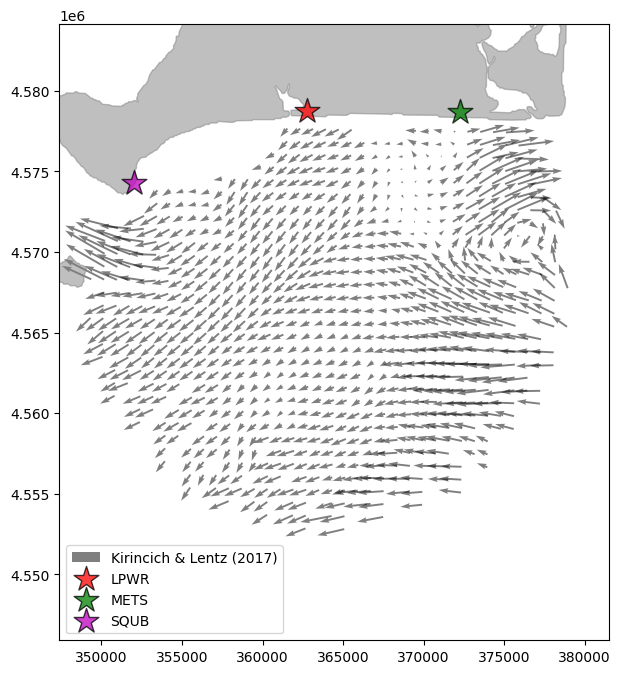

In [52]:
import afloat.plot.gif as zgif 

sites = ['LPWR', 'METS', 'SQUB']
radar_colours = ['r', 'g', 'm']

plt.figure()
qscale=2000
if True: # plot_utm:
    qscale /= 110000
scene = 5

east_eddy, north_eddy, z1, z2 = utm.from_latlon(lat_eddy.flatten(), lon_eddy.flatten())
east_eddy  = east_eddy.reshape(lat_eddy.shape)
north_eddy = north_eddy.reshape(lat_eddy.shape)

U, V = ds_eddy.East_vel.values, ds_eddy.North_vel.values
U, V = U[scene, :, :], V[scene, :, :]
blank = U==999.
U[blank] = np.nan

plt.figure(figsize=[8, 8])
plt.quiver(east_eddy, north_eddy, U.T*100, V.T*100, color='k', alpha=0.5, scale_units='xy', scale=qscale, label='Kirincich & Lentz (2017)', width=0.0035) 

plot_vinyard(plt.gca(), verts=verts_utm)
plt.gca().set_xlim(xl_utm)
plt.gca().set_ylim(yl_utm)

plt.gca().set_aspect('equal', adjustable='box')

for site_ind in [0, 1, 2]:
    coord_x, coord_y = all_coord_list[site_ind]
    plt.gca().scatter(coord_x, coord_y, marker='*', color=radar_colours[site_ind], s=350, alpha=0.75, edgecolors='k', label=sites[site_ind])

plt.legend()

# A code here to extract one radial

In [55]:

def get_one_radial(all_radial_data, scene, site='LPWR', search_bearing=None):

    print()
    print(site)

    df_radials
    scenetime = get_scenetime(scene)
    scene_radial_data = all_radial_data[scenetime]
    
    # print(scene_radial_data)

    site_ind = sites.index(site)

    site_bearing = scene_radial_data['deg'][site_ind].values
    site_E       = scene_radial_data['E'][site_ind]
    site_N       = scene_radial_data['N'][site_ind]
    site_u       = scene_radial_data['u'][site_ind].values
    site_v       = scene_radial_data['v'][site_ind].values
    site_range       = scene_radial_data['range'][site_ind].values

    if search_bearing is None:
        print('Bearing is none')
        bearings = list(set(site_bearing))
        bearings.sort()
        print(bearings)
    else:
        print('Bearing is not none')
        b_ind = np.where(site_bearing == search_bearing)[0]
        # print(b_ind)
        # print(site_bearing)

        print(f"I've got {len(b_ind)} points here, closest is {min(abs(site_range[b_ind]))} km")

        return site_ind, site_E[b_ind], site_N[b_ind], site_u[b_ind], site_v[b_ind], site_bearing[b_ind], site_range[b_ind]
    
    # print(scene_site_radial_data)
    pass


out = get_one_radial(all_radial_data, 1, site='SQUB')
out = get_one_radial(all_radial_data, 1, site='LPWR')
out = get_one_radial(all_radial_data, 1, site='METS')



SQUB
Bearing is none
[np.float64(4.0), np.float64(9.0), np.float64(14.0), np.float64(19.0), np.float64(24.0), np.float64(29.0), np.float64(34.0), np.float64(39.0), np.float64(249.0), np.float64(254.0), np.float64(259.0), np.float64(264.0), np.float64(269.0), np.float64(274.0), np.float64(279.0), np.float64(284.0), np.float64(289.0), np.float64(294.0), np.float64(299.0), np.float64(304.0), np.float64(309.0), np.float64(314.0), np.float64(319.0), np.float64(324.0), np.float64(329.0), np.float64(334.0), np.float64(339.0), np.float64(344.0), np.float64(349.0), np.float64(354.0), np.float64(359.0)]

LPWR
Bearing is none
[np.float64(206.0), np.float64(211.0), np.float64(216.0), np.float64(221.0), np.float64(226.0), np.float64(231.0), np.float64(236.0), np.float64(241.0), np.float64(246.0), np.float64(251.0), np.float64(256.0), np.float64(261.0), np.float64(266.0), np.float64(271.0), np.float64(276.0), np.float64(281.0), np.float64(286.0), np.float64(291.0), np.float64(296.0), np.float64(301

# Have a look now at the radials which hit land


SQUB
Bearing is not none
I've got 5 points here, closest is 2.1475 km

SQUB
Bearing is not none
I've got 5 points here, closest is 7.7309 km

SQUB
Bearing is not none
I've got 1 points here, closest is 8.1604 km

LPWR
Bearing is not none
I've got 3 points here, closest is 12.0259 km

METS
Bearing is not none
I've got 3 points here, closest is 6.8672 km

METS
Bearing is not none
I've got 3 points here, closest is 7.2964 km

METS
Bearing is not none
I've got 2 points here, closest is 24.8936 km

METS
Bearing is not none
I've got 4 points here, closest is 18.4556 km

METS
Bearing is not none
I've got 1 points here, closest is 27.898 km

METS
Bearing is not none
I've got 1 points here, closest is 5.1504 km


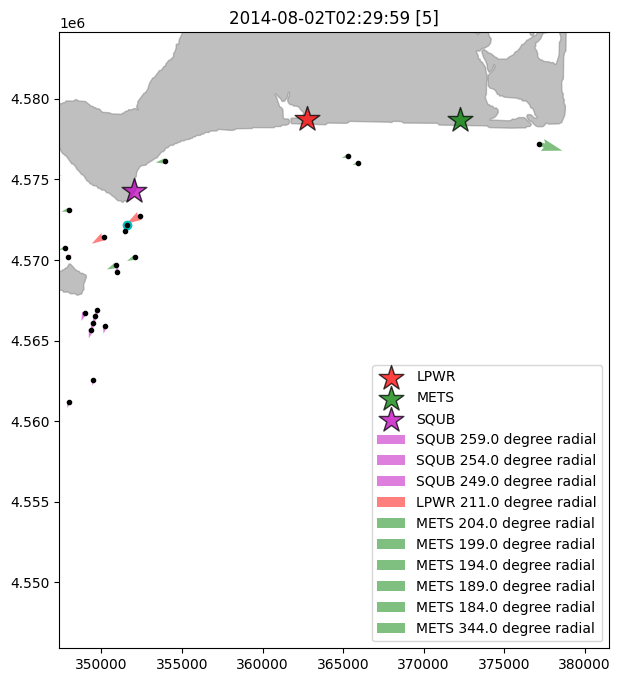

In [56]:
# site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, scene, site='SQUB', search_bearing=249.0)
# site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, scene, site='SQUB', search_bearing=254.0)
# site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, scene, site='SQUB', search_bearing=259.0)


# plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))


ax.set_xlim(xl_utm)
ax.set_ylim(yl_utm)

plot_vinyard(plt.gca(), verts=verts_utm)

for site_ind in [0, 1, 2]:
    coord_x, coord_y = all_coord_list[site_ind]
    ax.scatter(coord_x, coord_y, marker='*', color=radar_colours[site_ind], s=350, alpha=0.75, edgecolors='k', label=sites[site_ind])

def and_go(site, search_bearing):
    sf=0.5
    site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, scene, site=site, search_bearing=search_bearing)
    ax.quiver(E, N, u*sf, v*sf, color=radar_colours[site_ind], scale_units='xy', scale=qscale, label=f'{site} {search_bearing} degree radial', alpha=0.5)
    ax.plot(E, N, 'k.')

    return site_ind, E, N, u, v, Bearing, Range 


# Here I'm going to search for the closest radial to a point
search_N = 4572193
search_E = 351583
ax.plot(search_E, search_N, 'co')

def find_nearest(E, N, search_E, search_N):
    dist = np.sqrt((E-search_E)**2 + (N-search_N)**2)
    ind = np.argmin(dist)
    return ind
    

site = 'SQUB'
search_bearing = 259.0
site_ind, E, N, u, v, Bearing, Range  = and_go(site, search_bearing)
ind_SQUB = find_nearest(E, N, search_E, search_N)

and_go('SQUB', 254.0)
and_go('SQUB', 249.0)

# and_go('LPWR', 206.0)
and_go('LPWR', 211.0)

and_go('METS', 204.0)
and_go('METS', 199.0)
and_go('METS', 194.0)
and_go('METS', 189.0)
and_go('METS', 184.0)

and_go('METS', 344.0)

tst = f'{ds_eddy.datetime.values[scene]}'
tst = tst[0:tst.find('.')]
ax.set_title(f'{tst} [{scene}]')

ax.legend(loc='lower right')

ax.set_aspect('equal', adjustable='box')


# Plot radials against x [removed this cell]
Not sure this was that useful, go to the old notebook if desired. 

# Back to where we were

Now making this a modular code to run a scene from a scene number [0-47]

In [57]:
import gphelmholtz, numpy as np, matplotlib.pyplot as plt
import gphelmholtz.kernel 
from gptide import GPtideScipy
from scipy import linalg as la

# Scene to process
scene = 10

# Kernel function
kernel_fcn = 'square-exp'
my_decomposition = 'HelmholtzKernel'
params=['psi', 'phi', 'u', 'v']

my_decomposition = 'StreamFunctionKernel'
params=['psi', 'u', 'v']

sk = 1


NEW ONE HERE!!!


# No user input below

In [58]:

def extract_radials(all_radial_data, scene):

    scenetime = get_scenetime(scene)
    scene_radial_data = all_radial_data[scenetime]

    # Convcatenate all the radars
    radial_N_ = np.hstack(scene_radial_data['N'])
    radial_E_ = np.hstack(scene_radial_data['E'])
    radial_u_ = np.hstack(scene_radial_data['u'])
    radial_v_ = np.hstack(scene_radial_data['v'])
    radial_deg_ = np.hstack(scene_radial_data['deg'])
    radial_radial_ = np.hstack(scene_radial_data['radial'])
    radial_range_  = np.hstack(scene_radial_data['range'])

    # This does nothing
    # all_N_ = np.array(all_N)
    # all_E_ = np.array(all_E)
    # all_deg_ = np.array(all_deg)
    # all_u_ = np.array(all_u)
    # all_v_ = np.array(all_v)
    # all_r_ = np.array(all_r)

    # Subsample
    radial_north_  = radial_N_[0::sk]
    radial_east_   = radial_E_[0::sk]
    radial_deg_    = radial_deg_[0::sk]
    radial_u_      = radial_u_[0::sk]
    radial_v_      = radial_v_[0::sk]
    radial_radial_    = radial_radial_[0::sk]
    radial_range_     = radial_range_[0::sk]

    # Convert to radians
    radial_rad_ = radial_deg_ * np.pi/180

    n_data = len(radial_rad_)
    print(f'Extracted {n_data} radials for scene {scene} [{scenetime}]')

    return radial_north_, radial_east_, radial_rad_, radial_u_, radial_v_, radial_radial_, radial_range_, n_data
    

radial_north_, radial_east_, radial_rad_, radial_u_, radial_v_, radial_radial_, radial_range_, n_data = extract_radials(all_radial_data, scene)


Extracted 2286 radials for scene 10 [0500]


In [59]:
print(radial_rad_.shape)

(2286,)


# Now get the X coordinate for GPHelmholtz

In [60]:
export_grid = True

def get_X(radial_east_, radial_north_, east_eddy, north_eddy):

    n_data = len(radial_east_)
    X_data = np.vstack([radial_east_, radial_north_]).T
    if export_grid :
        X_model = np.vstack([east_eddy.ravel(), north_eddy.ravel()]).T
        n_model = X_model.shape[0]

        X = np.vstack([X_data, X_model])
    else:
        X = X_data
        n_kir = 0


    print(f'Processing scene {scene} which has {n_model} grid points and {n_data} radials')

    return X, X_model, n_model


X, X_model, n_model = get_X(radial_east_, radial_north_, east_eddy, north_eddy)
n_tot = n_model + n_data


Processing scene 10 which has 1404 grid points and 2286 radials


In [61]:
# L = 1

# covparams = (1., L, 0)

# K = my_kernel(kernel=kernel_fcn)
# myK = K(X, X.copy().T, covparams)


# if False:
#     Check_PSD(myK)


(2286, 7380)


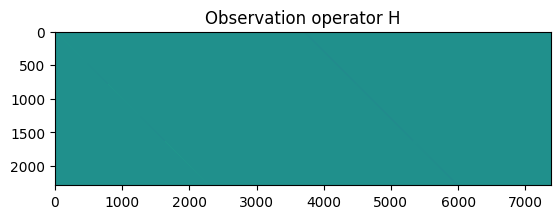

In [62]:
def get_H(all_rad_, n_data, n_model, plot=False):
    
    COS = np.diag(np.cos(all_rad_))
    SIN = np.diag(np.sin(all_rad_))

    _0 = np.zeros((n_data, n_model))

    H = np.hstack([COS, _0, SIN, _0])

    print(H.shape)
    if plot:
        plt.imshow(H)
        plt.title('Observation operator H')

    return H


H = get_H(radial_rad_, n_data, n_model, plot=True)

# Do some scaling
For numerical stability reasons we want a lengthscale of order 1. As such, we'll scale X/Y back to degrees. 

Need to scale quivers also. 

In [166]:

# These lengthscales are in meters
L = 4400   # This is a very narrow kernel
# L = 6600   # This is more like an averaging kernel
# L = 10000   # This is more like an averaging kernel
# L = 110000 * 1         # Big smooth kernel 
my_decomposition


'StreamFunctionKernel'

Got location jitter now, 5
Initialising SF Kernel
INITIALISED
CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0
Number of C_uu exceeding var_uu of 1.0 is 0
Number of C_vv exceeding var_vv of 1.0 is 0
[[-1.00000000e-20 -3.29914163e-03 -3.96678233e-02 ... -6.80552689e-10
  -2.23159390e-10 -7.07409706e-11]
 [-3.29914163e-03 -1.00000000e-20 -2.54963228e-02 ... -1.24640229e-09
  -4.09758820e-10 -1.30226365e-10]
 [-3.96678233e-02 -2.54963228e-02 -1.00000000e-20 ... -5.90142741e-09
  -1.95500256e-09 -6.26083466e-10]
 ...
 [-6.80552689e-10 -1.24640229e-09 -5.90142741e-09 ... -1.00000000e-20
   5.35190666e-04  2.03709813e-03]
 [-2.23159390e-10 -4.09758820e-10 -1.95500256e-09 ...  5.35190666e-04
  -1.00000000e-20  5.35112286e-04]
 [-7.07409706e-11 -1.30226365e-10 -6.26083466e-10 ...  2.03709813e-03
   5.35112286e-04 -1.00000000e-20]]
No more jitter here!!
Plotting now


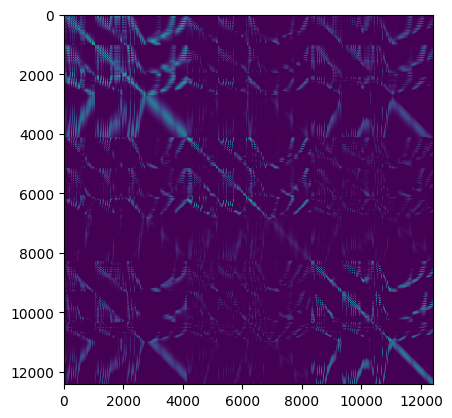

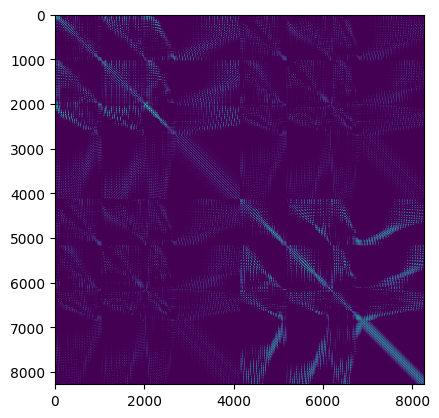

In [167]:

def get_B(my_decomposition, X, L, n_tot, plot=False):

    my_kernel = getattr(gphelmholtz.kernel, my_decomposition)

    K = my_kernel(kernel=kernel_fcn)

    # For numerical stability reasons we want a lengthscale of order 1. As such, we'll scale L and X by L. 
    L_stable = L/L # AKA 1
    if my_decomposition == 'HelmholtzKernel':
        # eta_phi, eta_psi, c, l
        covparams = (1, 1, 0, L_stable)
    else:
        covparams = (1, L_stable, 0)
    X_stable = X/L

    B2_full = K(X_stable, X_stable.copy().T, covparams) # This includes the streamfunction

    # Dropping the stream function 
    if my_decomposition == 'HelmholtzKernel': 
        B2 = B2_full[2*n_tot::, 2*n_tot::] 
    else: 
        B2 = B2_full[n_tot::, n_tot::] 

    if plot:
        print('Plotting now')
        plt.imshow(B2_full, vmax=1, vmin=0)
        plt.show()

        plt.imshow(B2, vmax=1, vmin=0)

    return B2, K

B2, K = get_B(my_decomposition, X, L, n_tot, plot=True)


In [168]:
scene_radial_data = all_radial_data['0000']
scene_radial_data.keys()

dict_keys(['N', 'E', 'u', 'v', 'deg', 'radial', 'range', 'coord'])

Now doing Ellipses
Done Ellipses
555


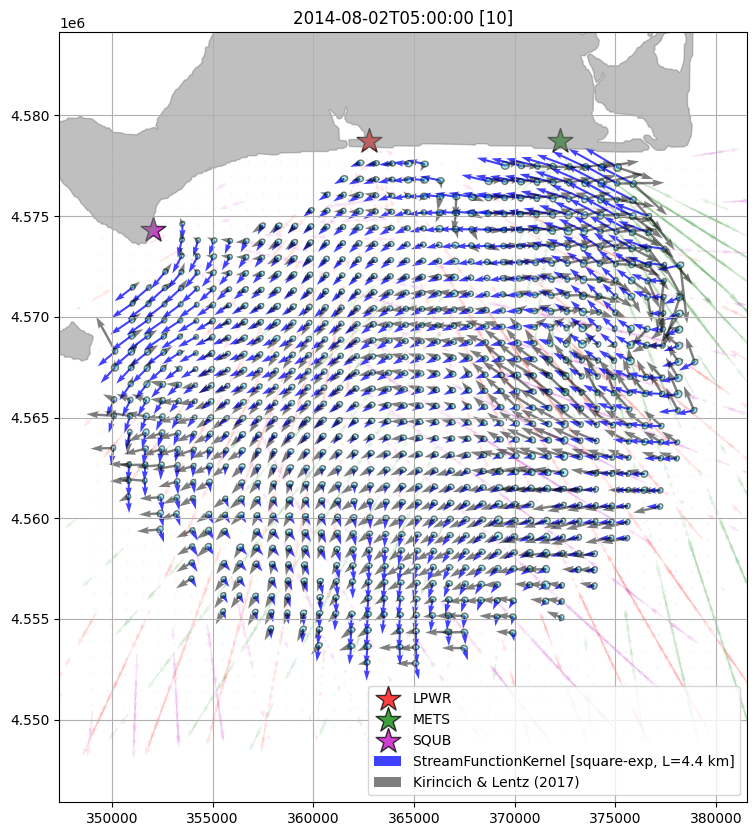

In [174]:

def do_the_krigging(all_radial_data, scene, n_data, radial_r_, H, B2, R_variance, qscale, my_decomposition, kernel_fcn, L, plot_ellipses=True):
        
    scenetime = get_scenetime(scene)
    scene_radial_data = all_radial_data[scenetime]

    # Pull the grid data
    U, V = ds_eddy.East_vel.values, ds_eddy.North_vel.values
    U, V = U[scene, :, :], V[scene, :, :]
    blank = U==999
    U[blank] = np.nan

    # Pull the radar data
    all_N_list = scene_radial_data['N']
    all_E_list = scene_radial_data['E']
    all_u_list = scene_radial_data['u']
    all_v_list = scene_radial_data['v']
    all_coord_list = scene_radial_data['coord']
    all_coord_list = scene_radial_data['coord']

    R = R_variance*np.eye(1*n_data) # This is your observational error

    radial_r_norm_ = -radial_r_ # / np.max(np.abs(all_r_))

    BHT  = B2 @ H.T
    HBHT = H @ B2 @ H.T

    HBHT_inv = np.linalg.inv(HBHT + R)

    x = BHT @ HBHT_inv @ radial_r_norm_

    

    x_u = x[0:len(x)//2]
    x_v = x[len(x)//2:]

    fig = plt.figure(figsize=(10, 10))

    # Title without decimal seconds
    tst = f'{ds_eddy.datetime.values[scene]}'
    tst = tst[0:tst.find('.')]
    plt.title(f'{tst} [{scene}]')

    for i, site in enumerate(sites):
        plt.quiver(all_E_list[i], all_N_list[i], all_u_list[i], all_v_list[i], color=radar_colours[i], alpha=0.1, scale_units='xy', scale=qscale)
        coord_x, coord_y = all_coord_list[i]
        plt.scatter(coord_x, coord_y, marker='*', color=radar_colours[i], s=350, alpha=0.75, edgecolors='k', label=site)

    px = X_model[:, 0]
    py = X_model[:, 1]
    pu = x_u[n_data::]
    pv = x_v[n_data::]

    pu[np.isnan((U.T).ravel())] = np.nan
    # plt.quiver(px, py, pu, pv, color='k', scale_units='xy', scale=qscale, label=f'Rotational Helmholtz [{kernel_fcn}, L={L:.2f}]')
    
    if True: # Comment this out for an intro type figure
        plt.quiver(px, py, pu, pv, color='b', alpha=0.75, scale_units='xy', scale=qscale, label=f'{my_decomposition} [{kernel_fcn}, L={L/1000:.1f} km]', width=0.003)
    
    plt.quiver(east_eddy, north_eddy, U.T*100, V.T*100, color='k', alpha=0.5, scale_units='xy', scale=qscale, label='Kirincich & Lentz (2017)', width=0.0035) 
    plt.legend(loc='lower right')
    plt.grid()

    plot_vinyard(plt.gca(), verts=verts_utm)
    plt.gca().set_xlim(xl_utm)
    plt.gca().set_ylim(yl_utm)

    plt.gca().set_aspect('equal', adjustable='box')

    
    if plot_ellipses:
        print('Now doing Ellipses')
        c = B2 - BHT @ HBHT_inv @ BHT.T # This is the prediction covariance

        Sigma_uu = np.diag(c[0:len(x)//2, 0:len(x)//2])
        Sigma_vv = np.diag(c[len(x)//2::, len(x)//2::])
        Sigma_uv = np.diag(c[0:len(x)//2, len(x)//2::])

        lambda_0 = []
        lambda_1 = []
        theta_e  = []

        for xx, yy, uu, vv, uv in zip(px, py, Sigma_uu, Sigma_vv, Sigma_uv):
            s = [[uu, uv], [uv, vv]]
            val, vec = np.linalg.eig(s)

            if val[0] >= val[1]:
                val0 = val[0]
                val1 = val[1]
                vec0 = vec[:, 0]
                vec1 = vec[:, 1]
            else:
                val0 = val[1]
                val1 = val[0]
                vec0 = vec[:, 1]
                vec1 = vec[:, 0]

            v1 = vec[0, :] # First eigenvector

            ang = np.arctan2(vec0[1], vec0[0])

            if False: # I don't know what convention this is. 
                ang = - ang # Just a convention thing 

            lambda_0 += [val0]
            lambda_1 += [val1]
            theta_e  += [ang]

            plt.gca().plot(xx, yy, 'c.', ms=0.1)

        print('Done Ellipses')

        import gphelmholtz.ellipses as ellipses  

        lambda_0 = np.abs(np.array(lambda_0))
        lambda_1 = np.abs(np.array(lambda_1))

        # Eigenvalues have the units of covariance
        lambda_0 = np.sqrt(lambda_0)
        lambda_1 = np.sqrt(lambda_1)

        n_plot = 1
        n_plot = len(x)
        blank = np.isnan(U.T)
        print(sum(blank.ravel()))
        lambda_0[blank.ravel()] = np.nan
        lambda_1[blank.ravel()] = np.nan
        # px_ = px.copy()
        # px[blank.ravel()]       = np.nan

        ellipses.plot_ellipses(px[0:n_plot], py[0:n_plot], lambda_0[0:n_plot], lambda_1[0:n_plot], theta_e[0:n_plot], scale=200, ax=plt.gca(), fill_color='c')

    return fig


plot_utm = True
qscale=2000
if plot_utm:
    qscale /= 110000


R_variance = 200
R_variance = 10

scene = 10
# scene = 0
plot_ellipses=True
fig = do_the_krigging(all_radial_data, scene, n_data, radial_radial_, H, B2, R_variance, qscale, my_decomposition, kernel_fcn, L, plot_ellipses=plot_ellipses)


In [161]:
L = 4400

# Where to now

1. Need to make all of this code more modular.
2. Need to run a full 24H
1. Need to runs some parcels comparisons

In [203]:
my_decomposition

'HelmholtzKernel'

# Try loop through

In [225]:
# Kernel function
kernel_fcn = 'square-exp'

my_decomposition = 'HelmholtzKernel'
params=['psi', 'phi', 'u', 'v']

# my_decomposition = 'StreamFunctionKernel'
# params=['psi', 'u', 'v']

# my_decomposition = 'PotentialKernel'
# params=['phi', 'u', 'v']

sk = 1

# These lengthscales are in meters
L = 4400   # This is a very narrow kernel
# L = 6600   # This is more like an averaging kernel
# L = 10000   # This is more like an averaging kernel
# L = 110000 * 1         # Big smooth kernel 
plot_utm = True

qscale=2000
if plot_utm:
    qscale /= 110000

R_variance = 200
R_variance = 10


In [226]:
result_dir = f'./results/{my_decomposition}'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

In [30]:
my_decomposition

'StreamFunctionKernel'

In [ ]:
my_decomposition

In [164]:
############

plot_ellipses=True

gm = zgif.gif_maker(f'24H_eddy_GP_{my_decomposition}_{kernel_fcn}_{dstr}_{plot_ellipses}.gif', f'./results/{my_decomposition}/gifs')

for scene in np.arange(0, 48):
    radial_north_, radial_east_, radial_rad_, radial_u_, radial_v_, radial_radial_, radial_range_, n_data = extract_radials(all_radial_data, scene)

    X, X_model, n_model = get_X(radial_east_, radial_north_, east_eddy, north_eddy)
    n_tot = n_model + n_data

    H = get_H(radial_rad_, n_data, n_model, plot=False)

    B2, K = get_B(my_decomposition, X, L, n_tot, plot=False)

    fig = do_the_krigging(all_radial_data, scene, n_data, radial_radial_, H, B2, R_variance, qscale, my_decomposition, kernel_fcn, L, plot_ellipses)
    # fig.savefig(f'kirincich_lentz_vs_helmholtz_{dstr}_{scene}-{scenetime}_{plot_ellipses}.png')
    
    gm.capture_fig(fig)
    plt.show()
    

Extracted 2733 radials for scene 0 [0000]
Processing scene 0 which has 1404 grid points and 2733 radials
(2733, 8274)
Got location jitter now, 5
Initialising SF Kernel
INITIALISED
CALLING
Number of C_psipsi exceeding var_psipsi of 1 is 0
Number of C_uu exceeding var_uu of 1.0 is 0
Number of C_vv exceeding var_vv of 1.0 is 0


/mnt/c/Users/00071913/OneDrive - UWA/Zulberti/git_repos_zulberti/gphelmholtz/gphelmholtz/kernel.py:464: SyntaxWarning: invalid escape sequence '\p'
  """
/mnt/c/Users/00071913/OneDrive - UWA/Zulberti/git_repos_zulberti/gphelmholtz/gphelmholtz/kernel.py:584: SyntaxWarning: invalid escape sequence '\p'
  """


KeyboardInterrupt: 

In [33]:
make_gif(gm, fps=10)


/tmp/ipykernel_63600/2392297156.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(still)


# Where to now
Hi

# Now what?
I need some code to check the difference between my fit and Kirincich at selected points. 

In [77]:
site='LPWR'
sites.index(site)


all_radial_data['0000']['E']

[array([366207.81961763, 367063.28318608, 369629.64468099, ...,
        356554.62317696, 356165.15479376, 355386.23168792]),
 array([378384.87573968, 378795.21636018, 393567.0383975 , 377401.6808482 ,
        377799.52235631, 378197.35535373, 378595.19657957, 392917.02045188,
        397293.04710736, 376817.49915054, 377199.80807867, 377582.11154406,
        377964.41791665, 378346.72719787, 378729.0310196 , 380640.56125325,
        381022.86599951, 389433.49810588, 390962.68901921, 391727.28547506,
        392491.87713295, 392874.17319743, 393256.46399823, 399755.44321038,
        373685.2652952 , 374049.1379314 , 375504.61623806, 375868.49092905,
        376232.36260679, 376596.23145991, 376960.10566769, 378415.58128484,
        378779.44916097, 379143.31402085, 379507.1842354 , 380234.92417127,
        380598.78570253, 387148.36190203, 387512.22573158, 387876.08636693,
        388239.95252781, 388603.81566593, 390059.26396265, 390423.12069652,
        391150.85022646, 391514.7064306

In [35]:
sites



SQUB
Bearing is none
[4.0, 9.0, 14.0, 19.0, 24.0, 29.0, 34.0, 39.0, 249.0, 254.0, 259.0, 264.0, 269.0, 274.0, 279.0, 284.0, 289.0, 294.0, 299.0, 304.0, 309.0, 314.0, 319.0, 324.0, 329.0, 334.0, 339.0, 344.0, 349.0, 354.0, 359.0]

LPWR
Bearing is none
[206.0, 211.0, 216.0, 221.0, 226.0, 231.0, 236.0, 241.0, 246.0, 251.0, 256.0, 261.0, 266.0, 271.0, 276.0, 281.0, 286.0, 291.0, 296.0, 301.0, 306.0, 311.0, 316.0, 321.0, 326.0, 331.0, 336.0, 341.0, 346.0, 351.0, 356.0]

METS
Bearing is none
[184.0, 189.0, 194.0, 199.0, 204.0, 209.0, 214.0, 219.0, 224.0, 229.0, 234.0, 239.0, 244.0, 249.0, 254.0, 259.0, 264.0, 269.0, 274.0, 279.0, 284.0, 289.0, 294.0, 299.0, 304.0, 309.0, 314.0, 319.0, 324.0, 329.0, 334.0, 339.0, 344.0, 349.0]


In [38]:
site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, 0, site='SQUB', search_bearing=4.0)



SQUB
Bearing is not none
I've got 43 points here, closest is 7.7309 km



SQUB
Bearing is not none
I've got 37 points here, closest is 2.1475 km

LPWR
Bearing is not none
I've got 15 points here, closest is 2.577 km

METS
Bearing is not none
I've got 23 points here, closest is 6.438 km


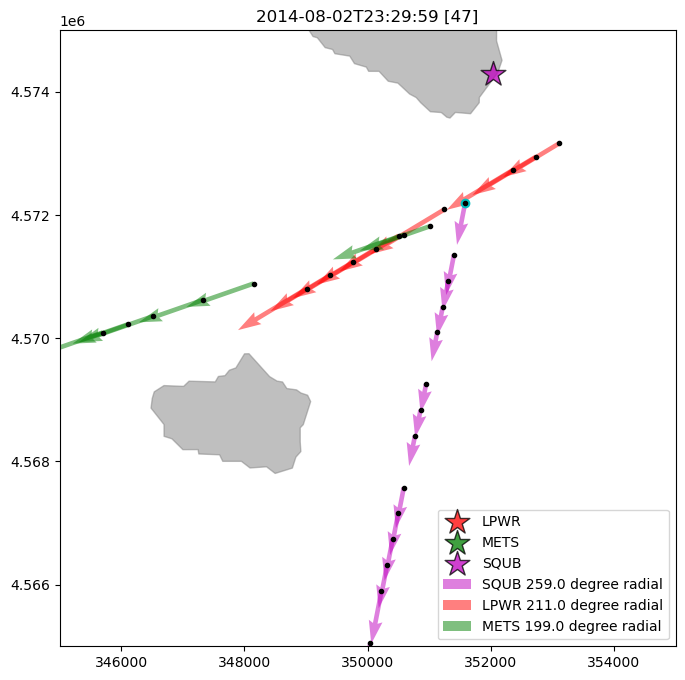

In [39]:
# site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, scene, site='SQUB', search_bearing=249.0)
# site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, scene, site='SQUB', search_bearing=254.0)
# site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, scene, site='SQUB', search_bearing=259.0)


# plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(1, 1, figsize=(8, 8))



ax.set_xlim(xl_utm)
ax.set_ylim(yl_utm)

plot_vinyard(plt.gca(), verts=verts_utm)

for site_ind in [0, 1, 2]:
    coord_x, coord_y = all_coord_list[site_ind]
    ax.scatter(coord_x, coord_y, marker='*', color=radar_colours[site_ind], s=350, alpha=0.75, edgecolors='k', label=sites[site_ind])

def and_go(site, search_bearing):
    sf=0.5
    site_ind, E, N, u, v, Bearing, Range = get_one_radial(all_radial_data, scene, site=site, search_bearing=search_bearing)
    ax.quiver(E, N, u*sf, v*sf, color=radar_colours[site_ind], scale_units='xy', scale=qscale, label=f'{site} {search_bearing} degree radial', alpha=0.5)
    ax.plot(E, N, 'k.')

    return site_ind, E, N, u, v, Bearing, Range 


# Here I'm going to search for the closest radial to a point
search_N = 4572193
search_E = 351583
ax.plot(search_E, search_N, 'co')

def find_nearest(E, N, search_E, search_N):
    dist = np.sqrt((E-search_E)**2 + (N-search_N)**2)
    ind = np.argmin(dist)
    return ind
    

site = 'SQUB'
search_bearing = 259.0
site_ind, E, N, u, v, Bearing, Range  = and_go(site, search_bearing)

ind_SQUB = find_nearest(E, N, search_E, search_N)

# and_go('LPWR', 206.0)
and_go('LPWR', 211.0)
and_go('METS', 199.0)


tst = f'{ds_eddy.datetime.values[scene]}'
tst = tst[0:tst.find('.')]
ax.set_title(f'{tst} [{scene}]')

ax.legend(loc='lower right')

ax.set_xlim(345000, 355000)
ax.set_ylim(4565000, 4575000)
ax.set_aspect('equal', adjustable='box')


In [49]:
all_coord_list[2]
# sites

[352035.5059930744, 4574292.84708028]


SQUB
Bearing is not none
I've got 15 points here, closest is 1.718 km

LPWR
Bearing is not none
I've got 20 points here, closest is 6.8719 km


(4565000.0, 4575000.0)

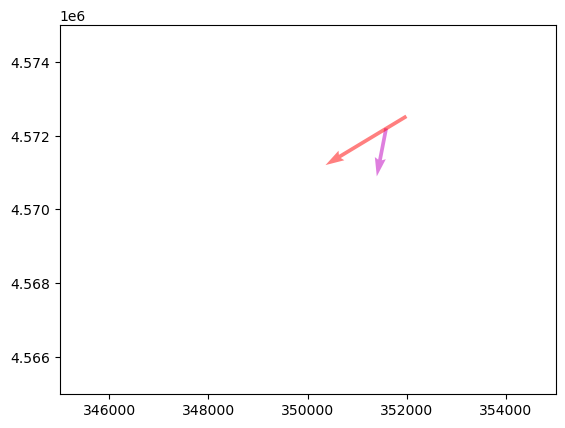

In [158]:
site = 'SQUB'
search_bearing = 259.0
site_ind, E, N, u, v, Bearing, Range  = and_go(site, search_bearing)

ind_SQUB = find_nearest(E, N, search_E, search_N)
plt.quiver(E[ind_SQUB], N[ind_SQUB], u[ind_SQUB]*1, v[ind_SQUB]*1, color=radar_colours[2], scale_units='xy', scale=qscale, label=f'{site} {search_bearing} degree radial', alpha=0.5)

site = 'LPWR'
site_ind, E, N, u, v, Bearing, Range  = and_go('LPWR', 211.0)
ind_SQUB = find_nearest(E, N, search_E, search_N)
plt.quiver(E[ind_SQUB], N[ind_SQUB], u[ind_SQUB]*1, v[ind_SQUB]*1, color=radar_colours[0], scale_units='xy', scale=qscale, label=f'{site} {search_bearing} degree radial', alpha=0.5)


plt.xlim(345000, 355000)
plt.ylim(4565000, 4575000)